In [6]:
import os
os.chdir('../../../MIRACLE-reproducibility')
from modules import utils
from os.path import join as pj
import matplotlib.pyplot as plt
plt.rc('font', size=15)

# Load time files

In [7]:
nn = 42

In [ ]:
! python train.py --task dcm_hcm --exp_prefix bts_ --epoch_list 10 

In [8]:
task = 'dcm_hcm'
exp_prefix = 'bts_'
bts_it = {}
bts_ct = {0:0}
for i in range(nn):
    p = pj('../../../MIRACLE-reproducibility/result/', task, exp_prefix+str(i),'default', 'time.csv')
    pp = pj('../../../MIRACLE-reproducibility/result/', task, exp_prefix+str(i),'default', 'p_time.csv')
    bts_it[i] = float(utils.load_csv(p)[0][0]) - float(utils.load_csv(pp)[0][0])
    bts_ct[i+1] = bts_ct[i] + bts_it[i]
print(bts_it)
print(bts_ct)

{0: 42.6129195690155, 1: 104.30302548408508, 2: 104.81225943565369, 3: 107.01298403739929, 4: 91.39561462402344, 5: 95.14866948127747, 6: 93.36560463905334, 7: 74.89611530303955, 8: 116.46858716011047, 9: 82.04546451568604, 10: 118.87406420707703, 11: 112.31398582458496, 12: 115.18741250038147, 13: 62.18161749839783, 14: 115.67275357246399, 15: 77.62190246582031, 16: 98.6835515499115, 17: 75.45255589485168, 18: 86.89855122566223, 19: 89.20204997062683, 20: 68.72725224494934, 21: 92.63178014755249, 22: 85.91208338737488, 23: 83.6318519115448, 24: 117.05471277236938, 25: 108.0893177986145, 26: 96.30328488349915, 27: 89.24679112434387, 28: 79.78776597976685, 29: 103.69266104698181, 30: 122.64560961723328, 31: 77.41743111610413, 32: 121.14547777175903, 33: 106.50081896781921, 34: 88.4414746761322, 35: 90.80428576469421, 36: 110.56745672225952, 37: 89.60927248001099, 38: 91.99083471298218, 39: 139.81679916381836, 40: 103.30305480957031, 41: 104.25573682785034}
{0: 0, 1: 42.6129195690155, 2:

In [ ]:
! for i in {1..42}; do python run.py --task dcm_hcm --experiment  increasing_offline_$[i-1] --epoch_num 10 --task num $i

In [10]:
task = 'dcm_hcm'
exp_prefix = 'increasing_offline_'
increasing_offline_it = {}
increasing_offline_ct = {0:0}
for i in range(nn):
    p = pj('../../../MIRACLE-reproducibility', task, exp_prefix+str(i),'default', 'time.csv')
    increasing_offline_it[i] = float(utils.load_csv(p)[0][0])
    increasing_offline_ct[i+1] = increasing_offline_ct[i] + increasing_offline_it[i]
print(increasing_offline_it)
print(increasing_offline_ct)

{0: 47.46804356575012, 1: 83.05022358894348, 2: 100.09079003334045, 3: 119.33230543136597, 4: 137.00853443145752, 5: 157.02437376976013, 6: 166.94373846054077, 7: 209.27584624290466, 8: 365.1973910331726, 9: 363.25642132759094, 10: 453.99144744873047, 11: 498.42130041122437, 12: 599.8558831214905, 13: 489.31242632865906, 14: 641.0678787231445, 15: 703.6975834369659, 16: 608.1800425052643, 17: 696.8654017448425, 18: 721.8969571590424, 19: 730.4503891468048, 20: 908.7434203624725, 21: 899.8984415531158, 22: 1002.214497089386, 23: 969.5008971691132, 24: 1215.0868113040924, 25: 1244.0414972305298, 26: 1150.7155058383942, 27: 1370.7152409553528, 28: 1437.9907660484314, 29: 1441.8749132156372, 30: 1682.439254283905, 31: 1754.1620984077454, 32: 1864.2576189041138, 33: 1901.755520105362, 34: 1775.9547445774078, 35: 1791.0314762592316, 36: 1810.551641702652, 37: 1943.7112967967987, 38: 1980.3046910762787, 39: 2198.177265405655, 40: 2203.174015045166, 41: 2720.331001520157}
{0: 0, 1: 47.46804356

# Visualization

In [11]:
import matplotlib.cm as cm
import numpy  as np
cmap = cm.get_cmap('Paired', 12)

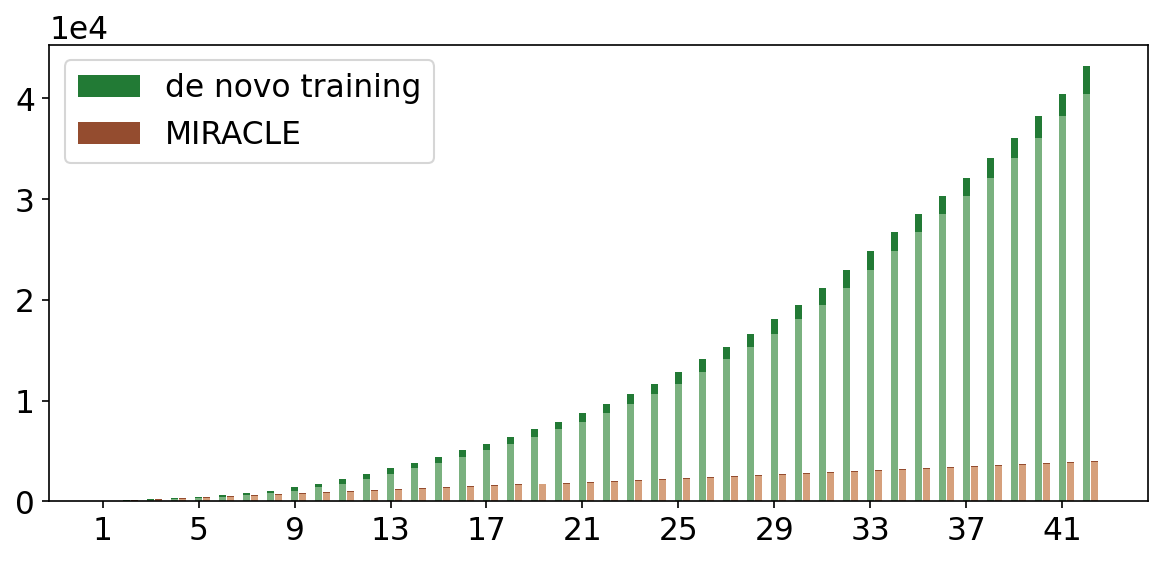

In [22]:
plt.figure(figsize=(8, 4),dpi=150)
ax = plt.gca()

ax.bar(list(range(0,nn*3,3)), list(increasing_offline_ct.values())[:nn], color='#7AB17F')
b1 = ax.bar(list(range(0,nn*3,3)), list(increasing_offline_it.values())[:nn], bottom=list(increasing_offline_ct.values())[:nn], color='#227A35')

ax.bar(list(range(1,nn*3+1,3)), list(bts_ct.values())[:nn], color='#D6A07C')
b2 = ax.bar(list(range(1,nn*3+1,3)), list(bts_it.values())[:nn], bottom=list(bts_ct.values())[:nn], color='#944C2F')

plt.xticks(list(range(0, 42*3+3,4*3)), list(range(1,42,4)))
ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.legend(handles=[b1.patches[0], b2.patches[0]], labels= ['de novo training', 'MIRACLE'], loc='upper left')
plt.grid(False)
plt.tight_layout()
# plt.savefig('time.pdf')